## The Spark Foundation

### Author - Gayatri Bhujade

#### Task 1: Predict the percentage of an student based on the no. of study hours and what will be predicted score if a student studies for 9.25 hrs/ day?

#### Step 1: Reading and Understanding the Data

Let's start with the following steps:

- Importing data using the pandas library
- Understanding the structure of the data

In [1]:
#Import library

#import numpy library for numerical operation
import numpy as np

#import pandas library for import, build, and manipulate DataFrames
import pandas as pd

#import matplotlib library for plotting 2Dgrapg, static, animated, and interactive visualizations
import matplotlib.pyplot as plt

#import seaborn library for making statistical graphics
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [2]:
# Supress Warnings useful to alert the user of some condition in a program, where that condition (normally) doesn’t warrant raising an exception and terminating the program.

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the given CSV file, and view some sample records

data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


As you can see there is only two variable Hours and Scores of student.

Let's inspect the various aspects of our dataframe

In [4]:
#The shape property returns a tuple representing the dimensionality of the DataFrame

data.shape

(25, 2)

As the format of shape would be (rows, columns) i.e. 25 rows and 2 columns

In [5]:
# IT is used to get a concise summary of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Return type of hours is in float format and type of scores is in integer format

In [6]:
#It is used to view some basic statistical details like percentile, mean, std etc.

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Step 2: Visualising the Data

Let's now visualise our data using seaborn.

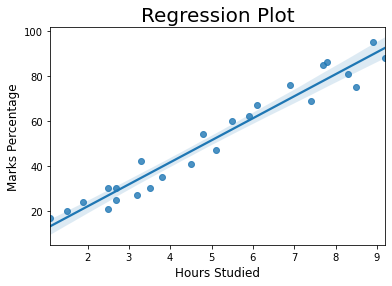

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [7]:
#regplot helps to creates a regression line between 2 variable hours and scores

sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

As linear par regression assumption variable hours and scores display some sort of a linear relationship; otherwise, there is no use of fitting a linear model between them and It is confirmed that the variables are positively correlated.

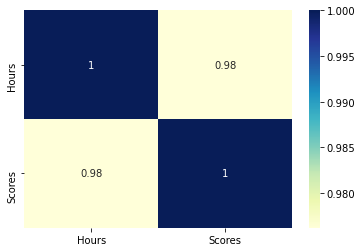

In [8]:
# The heatmap is to provide a colored visual summary of information.

sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the heatmap, the variable Scores seems to be correlated with Hours. So let's go ahead and perform simple linear regression.



#### Step 3: Performing Simple Linear Regression

We first assign the feature variable X and y.

Splitting the Data

In [9]:
# Defining X and y from the Data

X = data.iloc[:, :1].values
y = data.iloc[:, 1].values


##### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [10]:
# Spliting the Data in two

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Building a Linear Model

You first need to import the statsmodel.api library using which you'll perform the linear regression.


By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [11]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
reg = LinearRegression()

# Fit the model using lr.fit()
reg.fit(X_train, y_train)

LinearRegression()

In [12]:
print("Training Accuracy:", reg.score(X_train, y_train))
print("Test Accuracy:", reg.score(X_test, y_test))

Training Accuracy: 0.9570735354094693
Test Accuracy: 0.9309458862687437


#### Comparing the Predicted Marks with the Actual Marks

In [13]:
y_predicted=reg.predict(X_test)
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
comp

,Actual,Predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714
5,69,74.545829
6,76,69.609972
7,54,48.879371


In [14]:
hrs = 9.25
pred_score = reg.predict([[hrs]])

print("Number of hours: ", hrs)
print("Predicted score: ", pred_score[0])

Number of hours:  9.25
Predicted score:  92.80850057353504


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 92.80 marks.